# installing assets

In [40]:
!pip install matplotlib
!pip install numpy 
!pip install tqdm
!pip install gymnasium==0.27.0
!pip install flappy_bird_gymnasium
%matplotlib inline

^C
^C
^C
^C


# imports

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import flappy_bird_gymnasium
import time
import gymnasium as gym 
from collections import defaultdict

env = gym.make("FlappyBird-v0")

# class Model Agent

In [9]:
class FlappyBirdAgent:
    def __init__(
        self,
        learning_rate: float,
        initial_epsilon: float,
        epsilon_decay: float,
        final_epsilon: float,
        discount_factor: float = 0.95,
    ):
        """Initialize a Reinforcement Learning agent with an empty dictionary
        of state-action values (q_values), a learning rate and an epsilon.

        Args:
            learning_rate: The learning rate
            initial_epsilon: The initial epsilon value
            epsilon_decay: The decay for epsilon
            final_epsilon: The final epsilon value
            discount_factor: The discount factor for computing the Q-value
        """
        self.q_values = defaultdict(lambda: np.zeros(env.action_space.n))

        self.lr = learning_rate
        self.discount_factor = discount_factor

        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon

        self.training_error = []

    def get_action(self, obs) -> float:
        """
        Returns the best action with probability (1 - epsilon)
        otherwise a random action with probability epsilon to ensure exploration.
        """
        obs_tuple = tuple(obs)  # Convert obs to tuple

        # with probability epsilon return a random action to explore the environment
        if np.random.random() < self.epsilon:
            return env.action_space.sample()

        # with probability (1 - epsilon) act greedily (exploit)
        else:
            return int(np.argmax(self.q_values[obs_tuple]))

    def update(
        self,
        obs,
        action: int,
        reward: float,
        terminated: bool,
        next_obs,
    ):
        """Updates the Q-value of an action."""
        obs_tuple = tuple(obs)  # Convert obs to tuple
        next_obs_tuple = tuple(next_obs)  # Convert next_obs to tuple

        future_q_value = (not terminated) * np.max(self.q_values[next_obs_tuple])
        temporal_difference = (
            reward + self.discount_factor * future_q_value - self.q_values[obs_tuple][action]
        )

        self.q_values[obs_tuple][action] = (
            self.q_values[obs_tuple][action] + self.lr * temporal_difference
        )
        self.training_error.append(temporal_difference)

    def decay_epsilon(self):
        self.epsilon = max(self.final_epsilon, self.epsilon - self.epsilon_decay)
        
 



# Settings

In [10]:
       
        # hyperparameters
learning_rate = 0.0001
n_episodes = 1000000
start_epsilon = 0.1
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.001

agent = FlappyBirdAgent(
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

# Enviroment and learning

In [ ]:

env = gym.make("FlappyBird-v0")
agent = FlappyBirdAgent(learning_rate=0.1, initial_epsilon=1.0, epsilon_decay=0.001, final_epsilon=0.01)
scoreTimeLine = []
scoreTemp = -1
from IPython.display import clear_output
env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False
    

    # play one episode
    while not done:
        action = agent.get_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)
        
        # update the agent
        agent.update(obs, action, reward, terminated, next_obs)
        
        		# Commented code work on jupyther notebook
        	# GOOGLE COLLAB WILL CALL ERROR (AUDIO)
            	#it WORKS for us on jupyther notebook
                #saves score in list
    
            
            
            
        #if episode >= n_episodes - 10:
        #    time.sleep(1 / 60)  # FPS
        #    frame = env.render()
        
        #if info["score"] > 0 :
        #    
        #    time.sleep(1 / 30)  # FPS
        #    frame = env.render()
        
        # update if the environment is done and the current obs    
        done = terminated or truncated
        if terminated:
            scoreTimeLine.append(info["score"])
            scoreTemp = -1
        obs = next_obs

    agent.decay_epsilon()


# Graph and statistics

score List:  100000


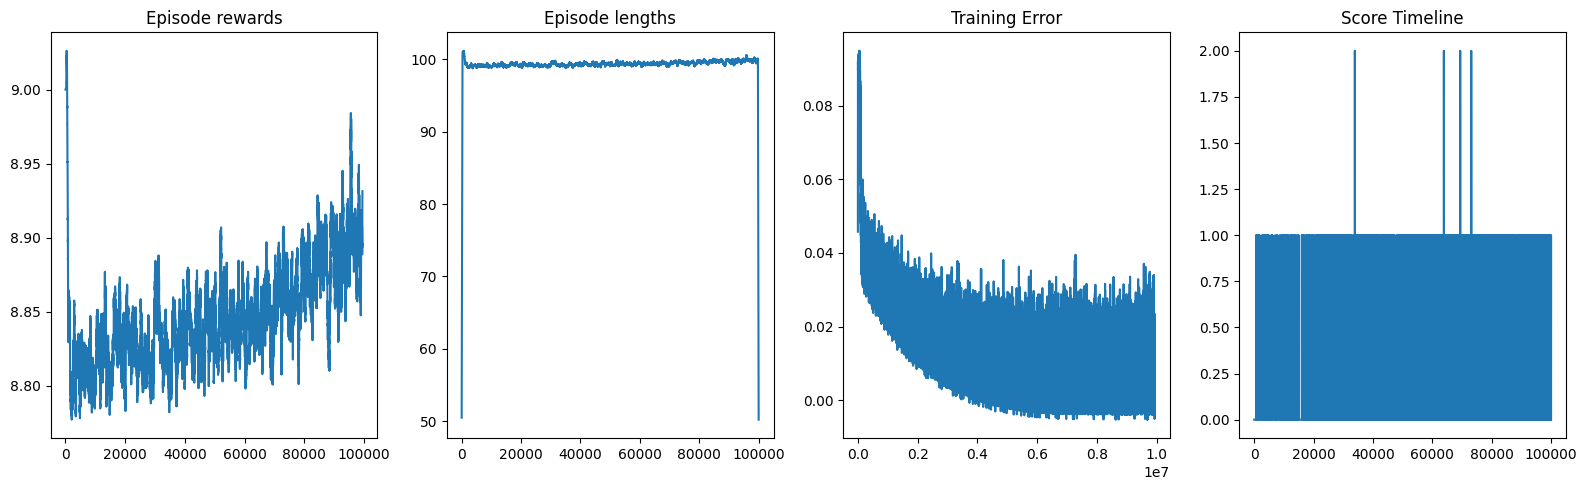

In [47]:
import matplotlib.pyplot as plt
import numpy as np

print("score List: ", len(scoreTimeLine))
#print(scoreTimeLine)

rolling_length = 500

fig, axs = plt.subplots(ncols=4, figsize=(16, 5))

axs[0].set_title("Episode rewards")
reward_moving_average = (
    np.convolve(
        np.array(env.return_queue).flatten(), np.ones(rolling_length), mode="valid"
    )
    / rolling_length
)
axs[0].plot(range(len(reward_moving_average)), reward_moving_average)

axs[1].set_title("Episode lengths")
length_moving_average = (
    np.convolve(
        np.array(env.length_queue).flatten(), np.ones(rolling_length), mode="same"
    )
    / rolling_length
)
axs[1].plot(range(len(length_moving_average)), length_moving_average)

axs[2].set_title("Training Error")
training_error_moving_average = (
    np.convolve(np.array(agent.training_error), np.ones(rolling_length), mode="same")
    / rolling_length
)
axs[2].plot(range(len(training_error_moving_average)), training_error_moving_average)

axs[3].set_title("Score Timeline")
axs[3].plot(range(len(scoreTimeLine)), scoreTimeLine)

plt.tight_layout()
plt.show()


In [66]:
import numpy as np
for i in np.arange(0.001, 2, 0.20):
    print(i)

0.001
0.201
0.401
0.6010000000000001
0.801
1.001
1.201
1.401
1.601
1.801
